In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy.stats import skew

In [2]:
data = load_wine(as_frame=True)

In [3]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
df = data.frame
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [8]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

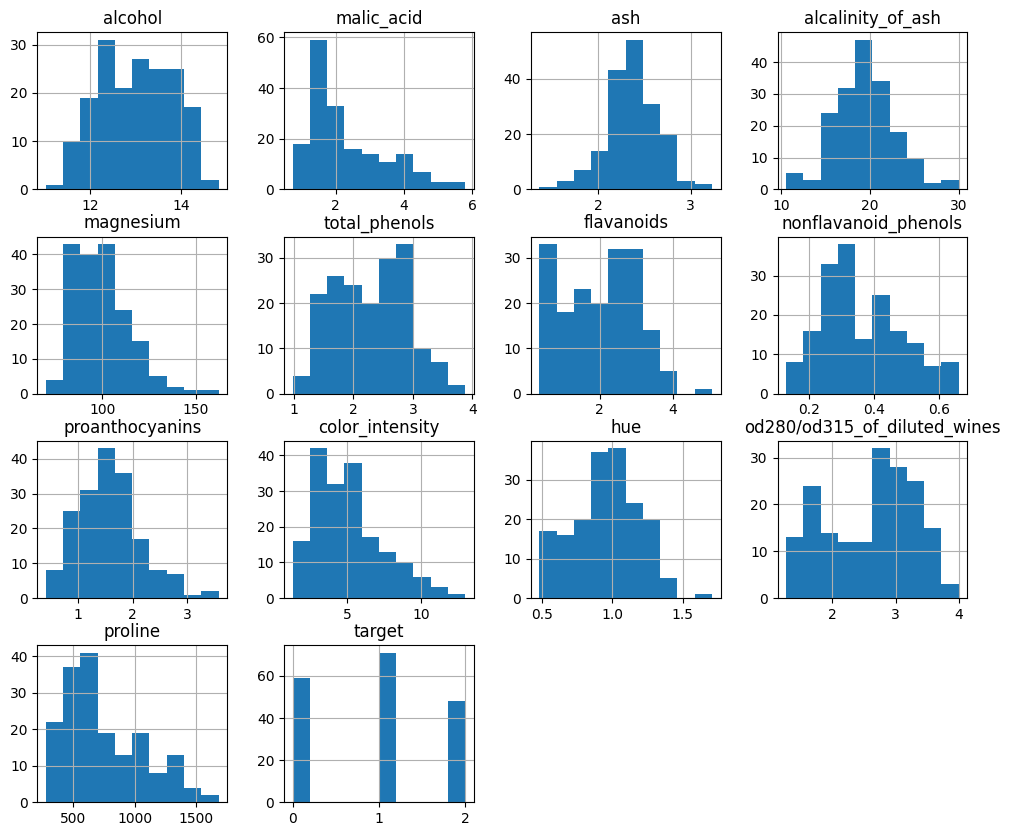

In [10]:
df.hist(figsize=(12,10))

In [11]:
numerical = df.select_dtypes(include=np.number).drop(columns=['target'],errors='ignore')
skews = numerical.apply(lambda x:skew(x.dropna()))
skewed_cols = skews[abs(skews) > 1].index.tolist()
print("Skewed Features",skewed_cols)

Skewed Features ['malic_acid', 'magnesium']


In [12]:
skewed_cols.extend(['proline','color_intensity'])
skewed_cols

['malic_acid', 'magnesium', 'proline', 'color_intensity']

In [13]:
pt = PowerTransformer()
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

In [14]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23   -0.435463  2.43               15.6   1.690748           2.80   
1      13.20   -0.338701  2.14               11.2   0.188127           2.65   
2      13.16    0.318077  2.67               18.6   0.261462           2.80   
3      14.37   -0.121469  2.50               16.8   1.020463           3.85   
4      13.24    0.523699  2.87               21.0   1.282104           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71    1.971560  2.45               20.5  -0.206899           1.68   
174    13.40    1.353424  2.48               23.0   0.333054           1.80   
175    13.27    1.516324  2.26               20.0   1.379377           1.59   
176    13.17    0.523699  2.37               20.0   1.379377           1.65   
177    14.13    1.439809  2.74               24.5  -0.123889           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29         0.451450  1.04   
1          2.76                  0.26             1.28        -0.110974  1.05   
2          3.24                  0.30             2.81         0.467301  1.03   
3          3.49                  0.24             2.18         1.182895  0.86   
4          2.69                  0.39             1.82        -0.141340  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06         1.153680  0.64   
174        0.75                  0.43             1.41         1.032950  0.70   
175        0.69                  0.43             1.35         1.790358  0.59   
176        0.68                  0.53             1.46         1.581288  0.60   
177        0.76                  0.56             1.35         1.556806  0.61   

     od280/od315_of_diluted_wines   proline  target  
0                            3.92  1.062541       0  
1                            3.40  1.029743       0  
2                            3.17  1.307868       0  
3                            3.45  1.810007       0  
4                            2.93  0.188985       0  
..                            ...       ...     ...  
173                          1.74  0.205257       2  
174                          1.56  0.237441       2  
175                          1.56  0.493246       2  
176                          1.62  0.507388       2  
177                          1.60 -0.473166       2  

[178 rows x 14 columns]

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

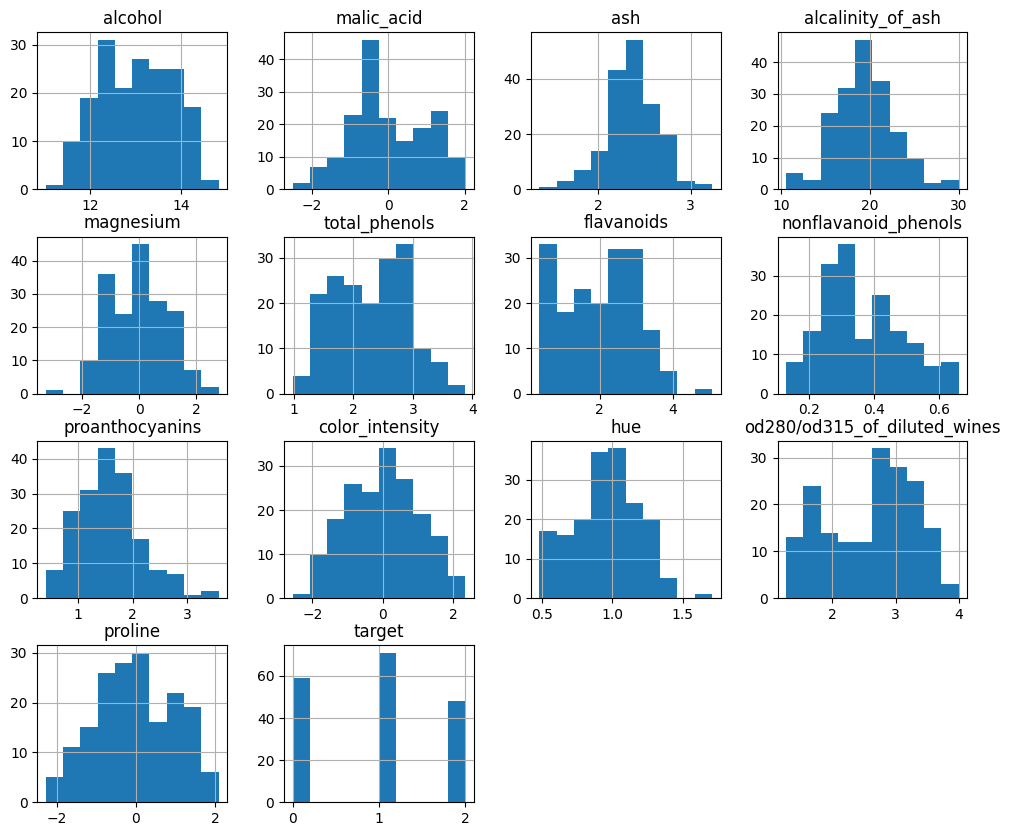

In [15]:
df.hist(figsize=(12,10))

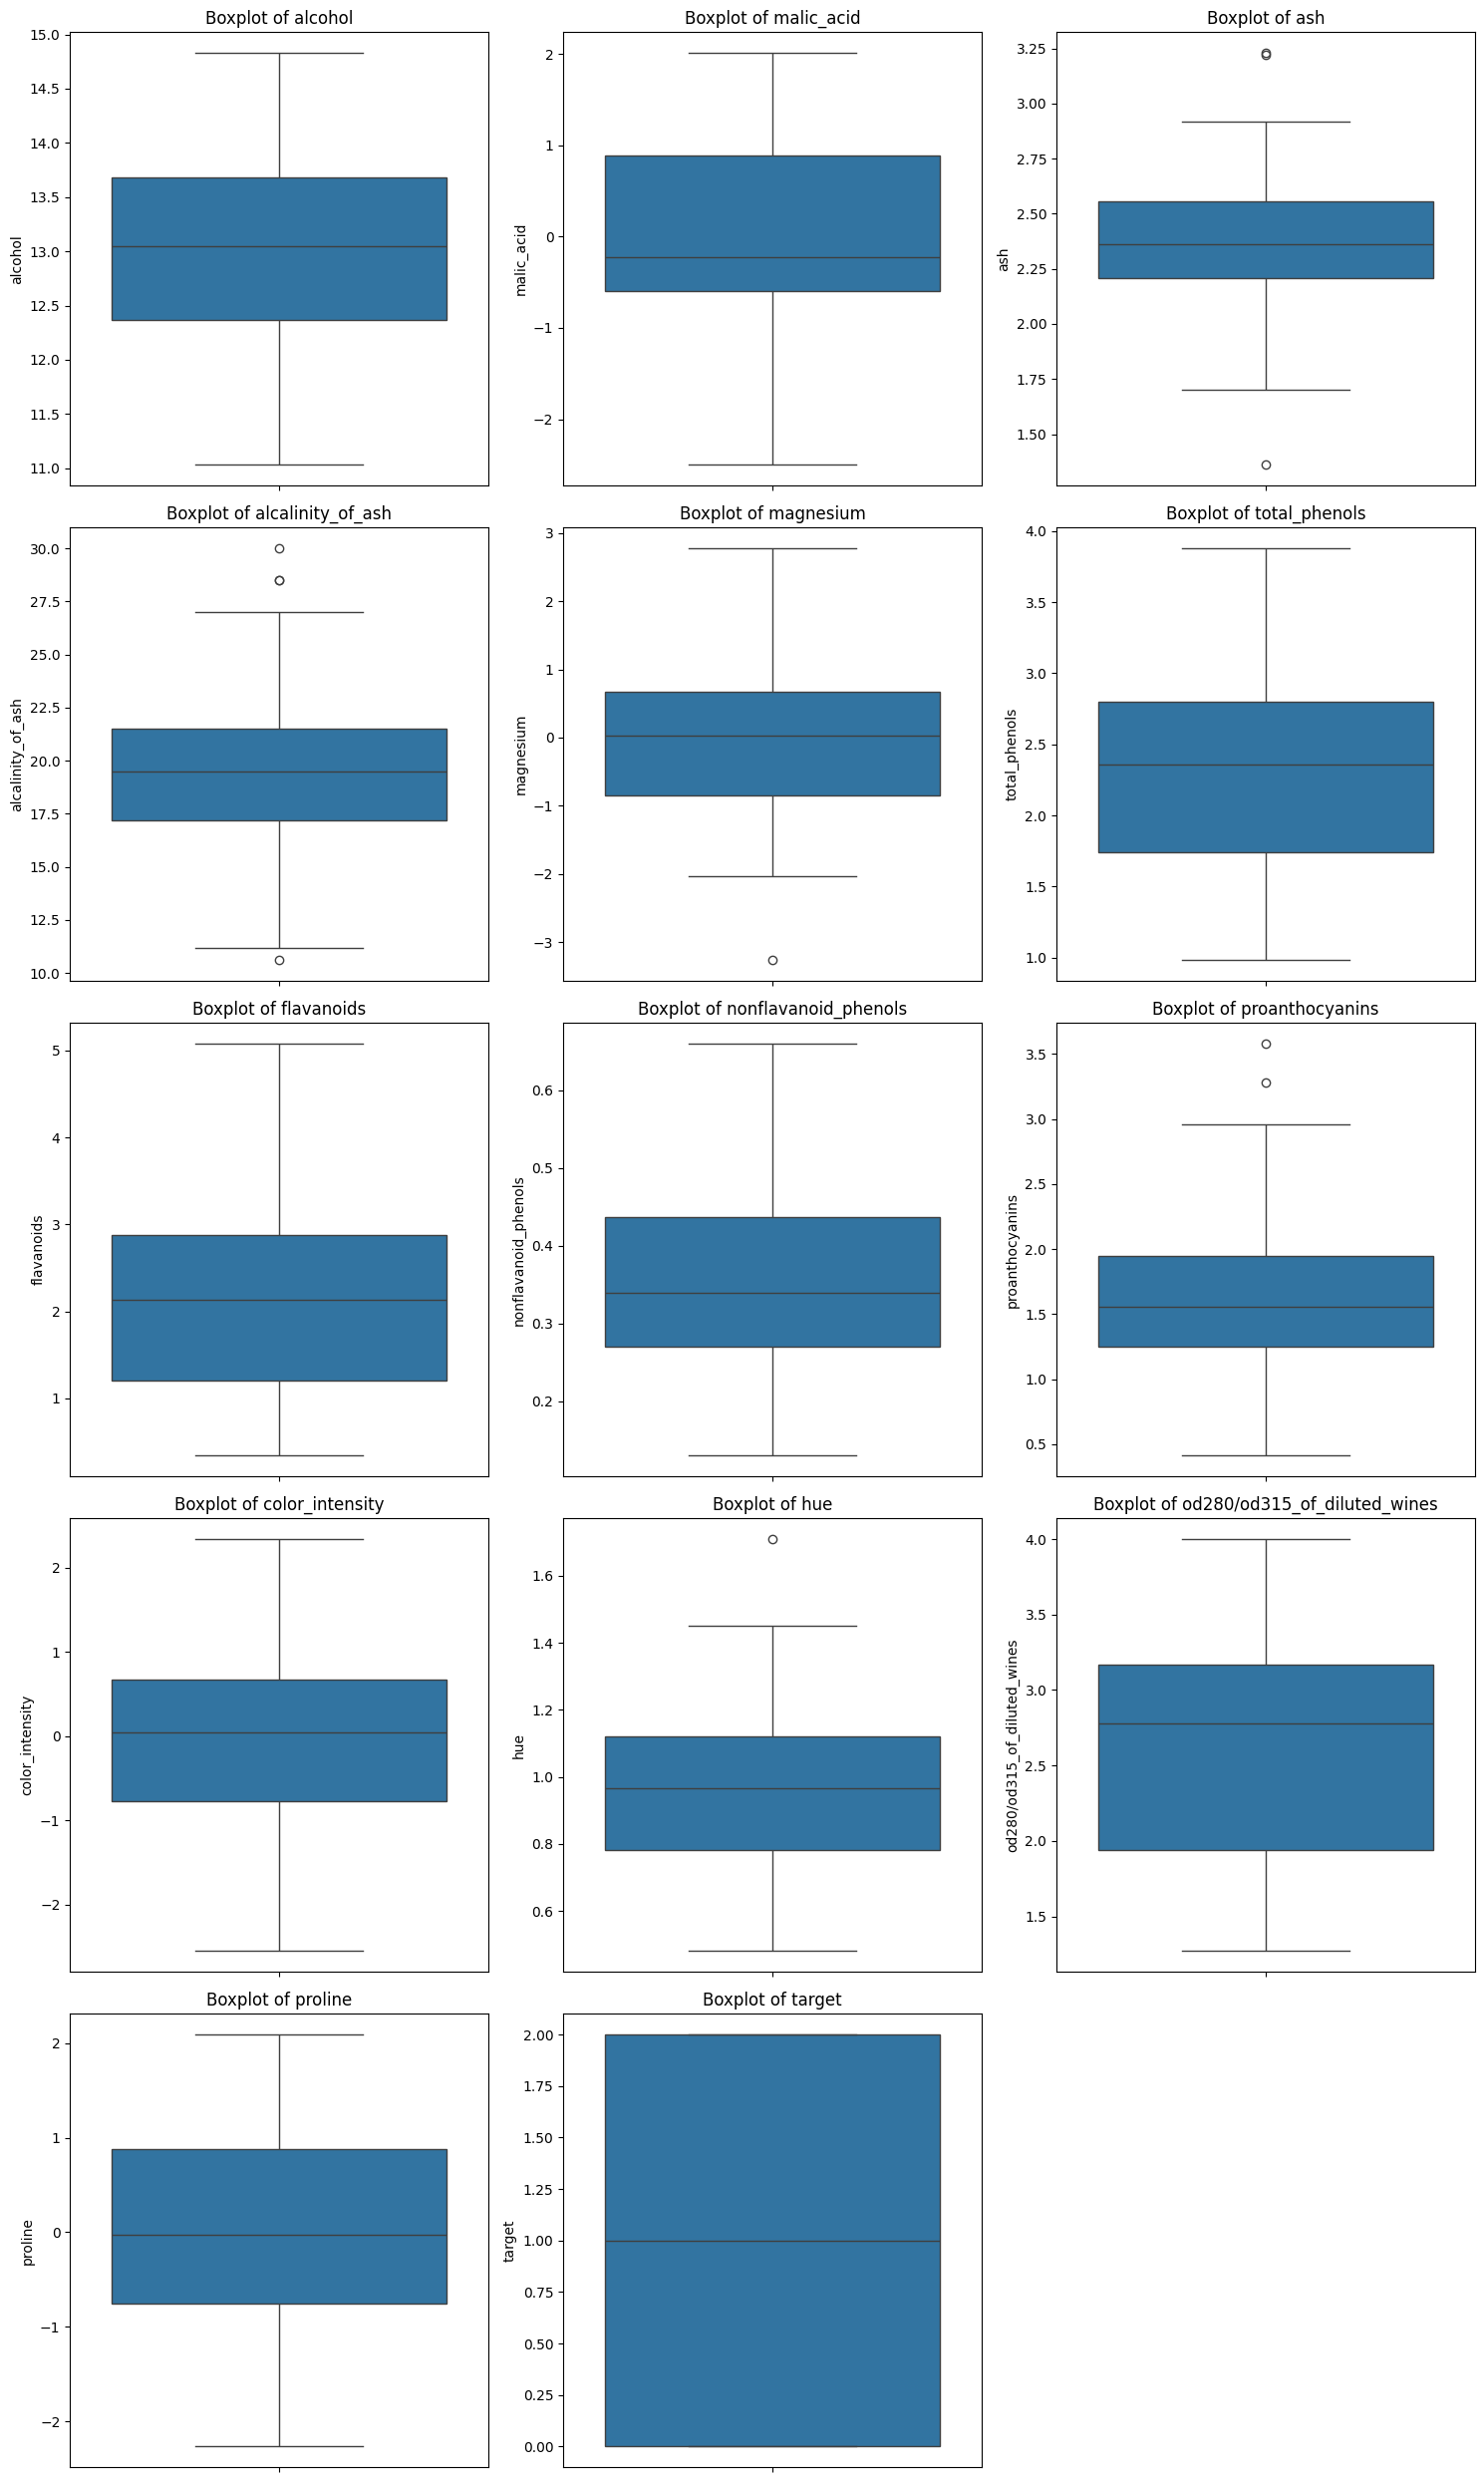

In [16]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols  # This will calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [17]:
#df.corr(method='pearson')['target'].drop('target')
corr_matrix = df.corr(method='pearson')
corr_matrix['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.380625
color_intensity                 0.180114
ash                            -0.049643
magnesium                      -0.223432
alcohol                        -0.328222
proanthocyanins                -0.499130
proline                        -0.559842
hue                            -0.617369
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

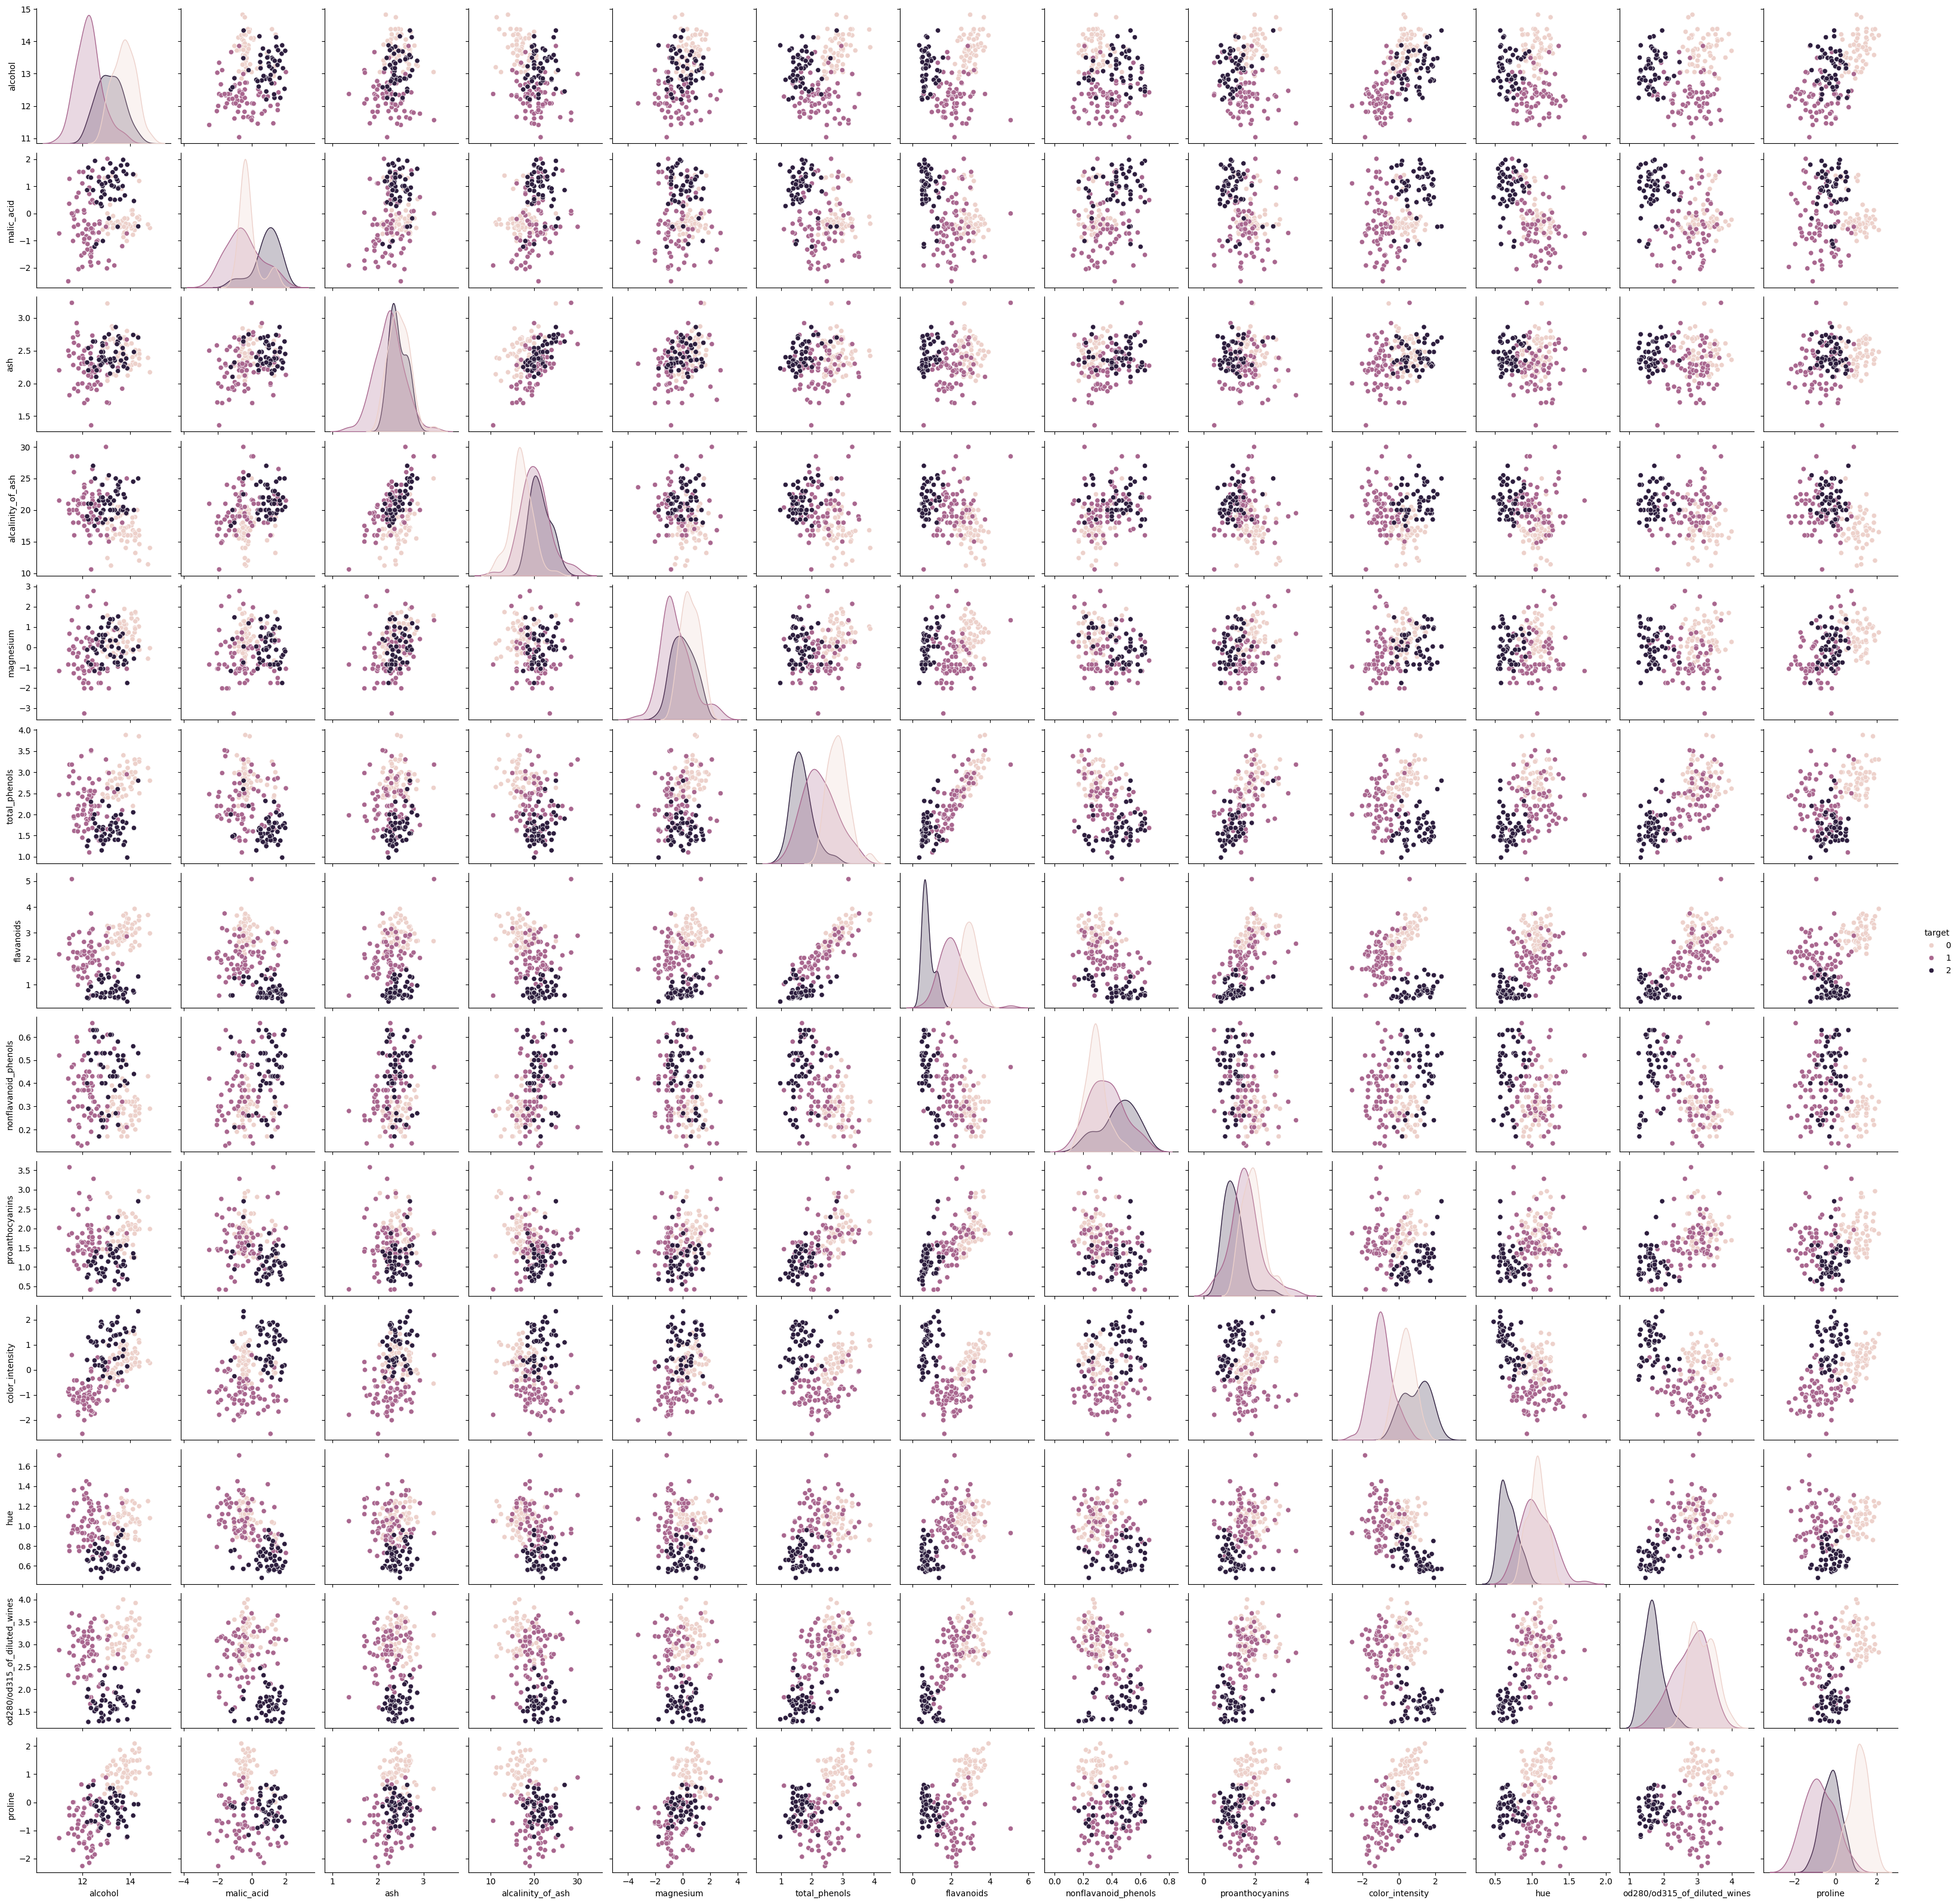

In [18]:
sns.pairplot(df,hue="target")

In [19]:
X = df.drop('target',axis=1)
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    stratify=y,
    random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)